(168, 300) (168, 300) (168, 300)
254 0 (6078418+0j) (-503450.7804178406-502880.06651912787j) (6078418+0j) (-503450.7804178406-502880.06651912787j)
(168, 300)


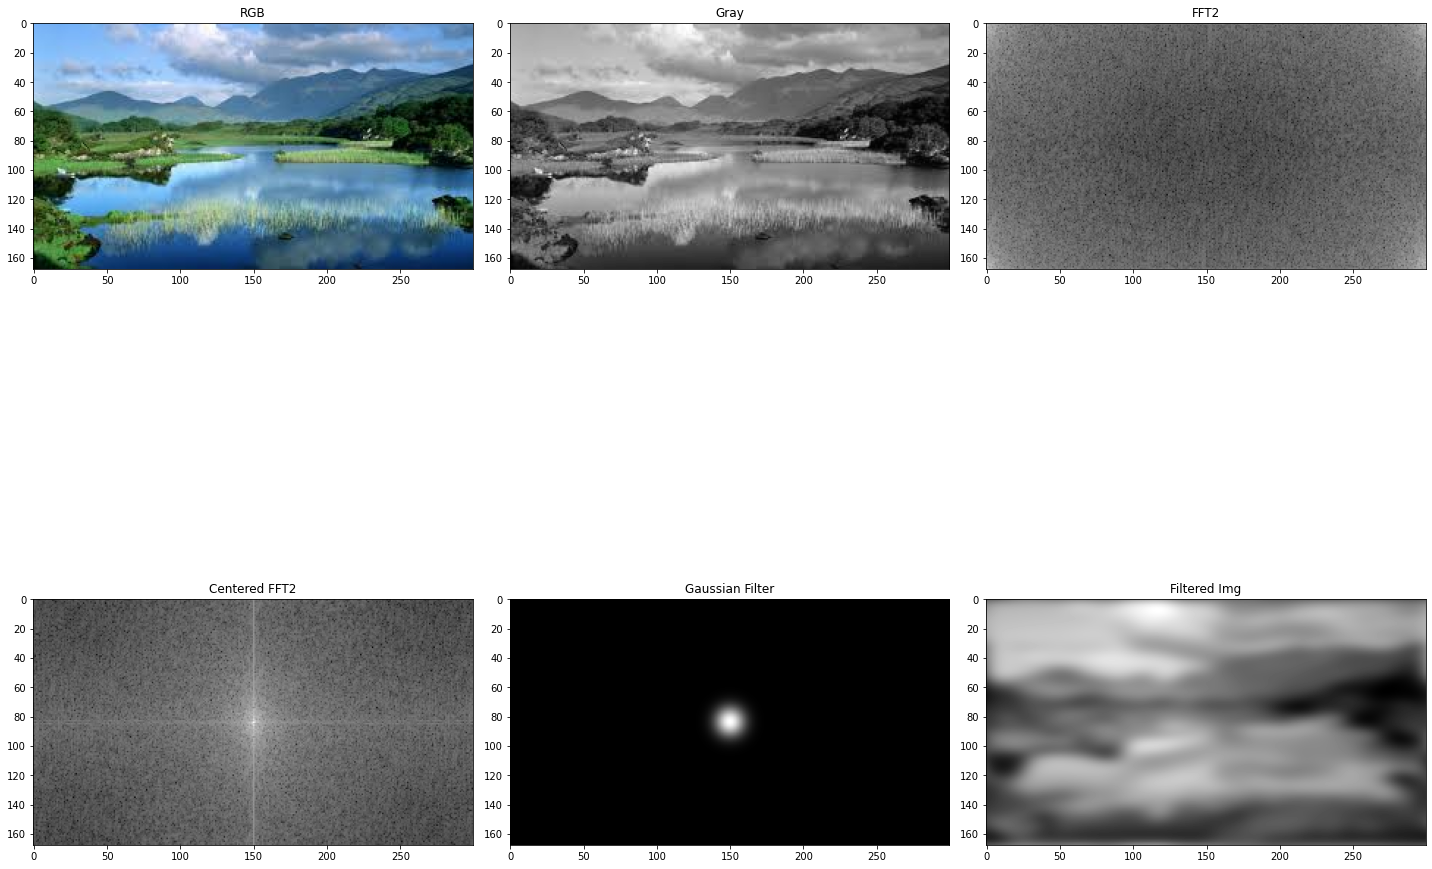

In [1]:
#	=====================================================================
#	Purpose: To understand the effect of Fourier Transform on an image.
#	---------------------------------------------------------------------
#	Sangeeta Biswas
#	Associate Professor
#	University of Rajshahi, Rajshahi
#	12.8.2022
#	=====================================================================
import matplotlib.pyplot as plt
import cv2
import numpy as np

def main():
	# Load image.
	img_path = '../village.jpeg'#GhostPepper.jpg' #PaddyField.jpeg'
	rgb = plt.imread(img_path)

	# Convert images
	gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

	# Perform Fast Fourier Transformation for 2D signal, i.e., image
	ftimg = np.fft.fft2(gray)
	centered_ftimg = np.fft.fftshift(ftimg)
	magnitude_spectrum = 100 * np.log(np.abs(ftimg))
	centered_magnitude_spectrum = 100 * np.log(np.abs(centered_ftimg))

	print(gray.shape, ftimg.shape, centered_ftimg.shape)
	print(gray.max(), gray.min(), ftimg.max(), ftimg.min(), centered_ftimg.max(), centered_ftimg.min())

	# Build a Gaussian filter.
	ncols, nrows = gray.shape
	gaussian_filter = build_gaussian_filter(ncols, nrows)

	# Apply Gaussian filter
	ftimg_gf = centered_ftimg * gaussian_filter
	filtered_img = np.abs(np.fft.ifft2(ftimg_gf))

	# Save images all together by matplotlib.
	img_set = [rgb, gray, magnitude_spectrum, centered_magnitude_spectrum, gaussian_filter, filtered_img]
	title_set = ['RGB', 'Gray', 'FFT2', 'Centered FFT2', 'Gaussian Filter', 'Filtered Img']
	figpath = 'FFT2.png'
	matplotlib_plot_img(img_set, title_set, figpath)

def build_gaussian_filter(ncols, nrows):
	sigmax, sigmay = 10, 10
	cx, cy = nrows/2, ncols/2
	x = np.linspace(0, nrows, nrows)
	y = np.linspace(0, ncols, ncols)
	X, Y = np.meshgrid(x, y)
	gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
	print(gaussian_filter.shape)

	return gaussian_filter
	
def matplotlib_plot_img(img_set, title_set, figpath):
	plt.rcParams.update({'font.size': 22})			
	plt.figure(figsize = (20, 20))
	n = len(img_set)
	for i in range(n):
		plt.subplot(2, 3, i + 1)
		plt.title(title_set[i])
		img = img_set[i]
		ch = len(img.shape)
		if (ch == 2):
			plt.imshow(img, cmap = 'gray')
		else:
			plt.imshow(img)			

	plt.tight_layout()
	plt.savefig(figpath)	
	plt.show()

if __name__ == '__main__':
	main()